In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import math
plt.style.use("Solarize_Light2")
warnings.filterwarnings("ignore")

In [9]:
np.random.seed(7)

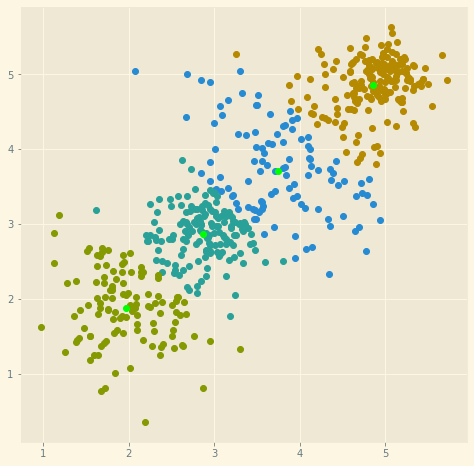

In [10]:
def get_data(num_centers, num_points):
    
    loc = [i for i in range(1, math.ceil((1.5 * num_centers)))]
    mu = [random.choice(loc)]; loc.remove(mu[0])
    sigma = np.random.uniform(.25, .85, 1)
    blobs = np.random.normal(mu, sigma, (2, num_points)) 
    for i in range(1, num_centers):
        mu.append(random.choice(loc)); loc.remove(mu[i])
        sigma = np.random.uniform(.25, .85, 1)
        blobs0 = np.random.normal(mu[i], sigma, (2, num_points))
        blobs = np.concatenate((blobs, blobs0), axis=1)
    return blobs

def distance(data, centers):
    return np.sqrt(np.sum((data-centers)**2, axis=1))

def separate(distances, data):
    ds= [[] for i in range(len(distances))]
    for j, i in enumerate(zip(*distances)):
        idx = np.argmin(i)
        ds[idx].append(data.T[j])
        
    dss = np.array([np.array(j) for j in ds])
    new_centers = [i.mean(axis=0) for i in dss]
    return np.array(dss), new_centers

def fit(num_centers, num_points, iterations=20):
    
    data = get_data(num_centers, num_points)
    centers = np.array([np.random.uniform(data.min(),data.max(),2) 
                        for i in range(num_centers)])
    
    for k in range(iterations):
        distances = [distance(data.T, i) for i in centers]
        separated, centers = separate(distances, data)

        
    plt.figure(figsize=(8,8))
    
    for scat in separated:
        plt.scatter(*scat.T)
    plt.scatter(*np.array(centers).T, color='lime')

fit(4, 142, 20)